In [1]:
# Funktion der kan bruges til at installere manglende packages
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Installér fasttext
install('fasttext')

In [2]:
import fasttext

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [132]:
# Træn modellen ud fra givne parameter
data_train = 'test.train'
data_valid = 'test.valid'
epoch      = 15
lr         = 0.5
wordNgrams = 2
bucket     = 200000
dim        = 100
loss       = 'ova'

In [133]:
model = fasttext.train_supervised(input=data_train, epoch=epoch, lr=lr, wordNgrams=wordNgrams, bucket=bucket, dim=dim, loss=loss)

# Funktion til at formattere testresultatet af modellen for pænere visning
def print_result(N, p, r):
    print('Samples\t\t' + str(N))
    print('Precision\t{:.3f}'.format(p))
    print('Recall\t\t{:.3f}\n'.format(r))

print('-- Training')
print_result(*model.test('test.train'))

print('-- Validation')
print_result(*model.test('test.valid'))

-- Training
Samples		4998
Precision	0.970
Recall		0.970

-- Validation
Samples		2229
Precision	0.821
Recall		0.821



In [ ]:
# Find den mest optimale epoch iteration af datasættet og vis testresultatet til sammenligning af train og valid 
models_train = []
models_valid = []
model_valid_epoch = 0
model_valid_peak = 0.0

with tqdm(total=epoch) as progress:
    print('        ', 'Training', '     | ', 'Validation')
    print('        ', 'Prec.', 'Recall  | ', 'Prec.', 'Recall')
    
    for i in range(epoch):
        progress.update(1)

        model = fasttext.train_supervised(input=data_train, epoch=i, lr=lr, wordNgrams=wordNgrams, bucket=bucket, dim=dim, loss=loss)
        models_train.append(model.test('test.train', k=2))
        models_valid.append(model.test('test.valid', k=2))
        
        if (models_valid[i][1] > model_valid_peak):
            model_valid_peak = models_valid[i][1]
            model_valid_epoch = i+1
            precision = '\033[92mHigher\033[0m'
        else:
            precision = '\033[91mLower\033[0m'
        
        print('{0:2}'.format(i+1), ' ==> ', '{:.3f}'.format(models_train[i][1]), ' {:.3f}'.format(models_train[i][2]),
              ' |', ' {:.3f}'.format(models_valid[i][1]), ' {:.3f}'.format(models_valid[i][2]), ' ==> ', precision)

    print('\n    -->  Epoch peaked at', '\033[1m' + '\033[94m' + str(model_valid_epoch))

         Training      |  Validation
         Prec. Recall  |  Prec. Recall
 1  ==>  0.040  0.079  |  0.041  0.083  ==>  Higher
 2  ==>  0.450  0.900  |  0.438  0.877  ==>  Higher
 3  ==>  0.457  0.914  |  0.449  0.898  ==>  Higher
 4  ==>  0.457  0.914  |  0.450  0.901  ==>  Higher
 5  ==>  0.465  0.930  |  0.455  0.911  ==>  Higher


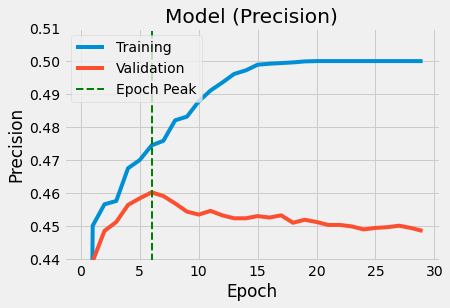

In [130]:
# Visualisér modellens præcision
threshold = 0.1
y_range_min = min([pr[1] for pr in models_valid if pr[1] > threshold])
y_range_max = max([pr[1] for pr in models_train if pr[1] > threshold])

plt.plot([pr[1] for pr in models_train], label='Training')
plt.plot([pr[1] for pr in models_valid], label='Validation')
plt.axvline(model_valid_epoch-1, linewidth=2, color='g', linestyle='--', label=('Epoch Peak'))

plt.title('Model (Precision)')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.ylim([y_range_min, y_range_max+0.01])
plt.show()

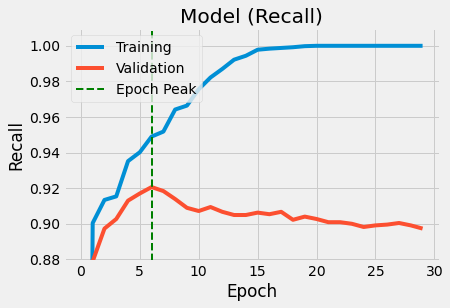

In [131]:
# Visualisér modellens recall
threshold = 0.1
y_range_min = min([pr[2] for pr in models_valid if pr[2] > threshold])
y_range_max = max([pr[2] for pr in models_train if pr[2] > threshold])

plt.plot([pr[2] for pr in models_train], label='Training')
plt.plot([pr[2] for pr in models_valid], label='Validation')
plt.axvline(model_valid_epoch-1, linewidth=2, color='g', linestyle='--', label=('Epoch Peak'))

plt.title('Model (Recall)')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.ylim([y_range_min, y_range_max+0.01])
plt.show()